In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import math
import time

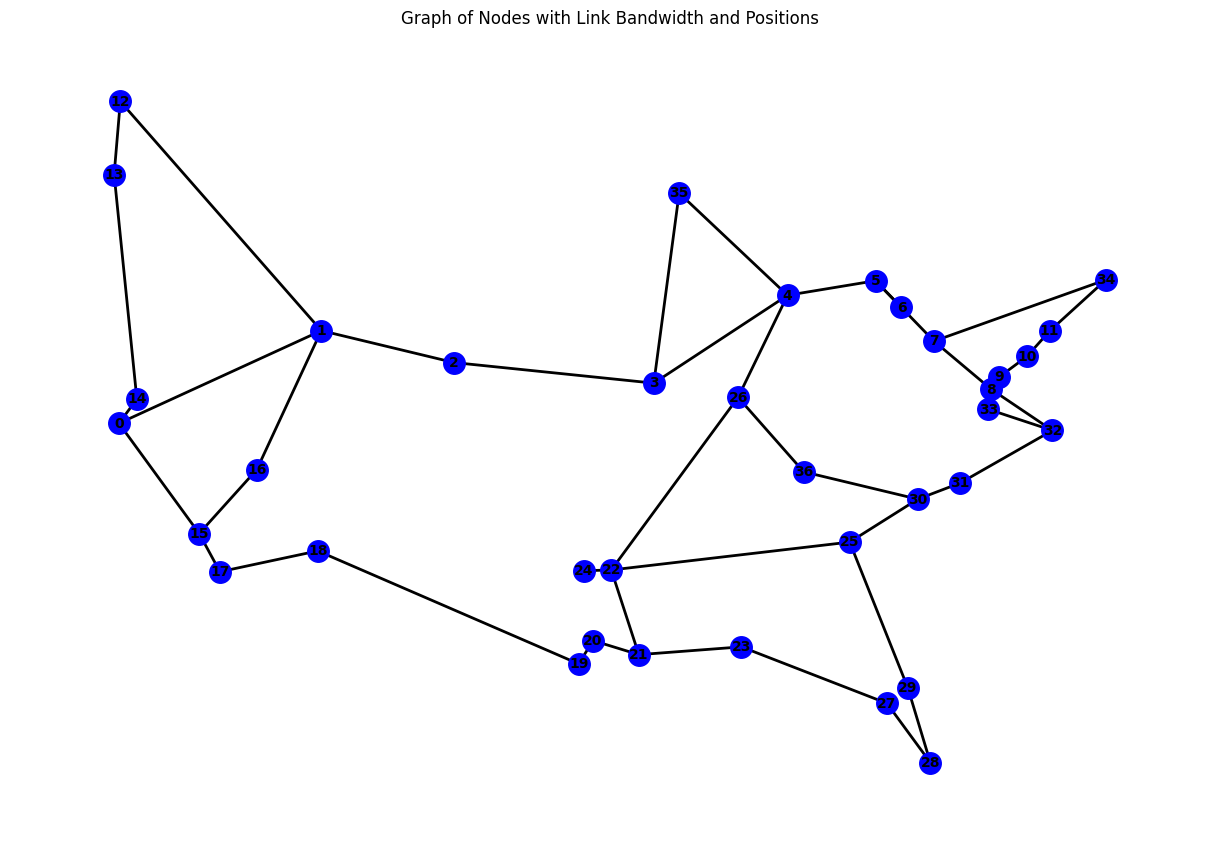

In [2]:
# Data koordinat dan ID nodes
coordinates_data = {
    'ID': list(range(37)),
    'Latitude': [
        37.775196, 40.771592, 39.755092, 39.090432, 41.879535, 42.330165,
        41.499713, 40.438355, 38.892091, 39.286534, 39.951639, 40.757929,
        47.620716, 45.523104, 38.573659, 34.052187, 36.233048, 32.718834,
        33.448263, 29.425037, 30.268735, 29.759956, 32.781078, 30.042487,
        32.754920, 33.754487, 38.627522, 27.981460, 25.774252, 28.553154,
        35.231402, 35.779748, 37.540778, 38.940575, 42.358880, 44.977482,
        36.158880
    ],
    'Longitude': [
        -122.419204, -111.888189, -104.988123, -94.583653, -87.624333, -83.045913,
        -81.693716, -80.001983, -77.024055, -76.613558, -75.163808, -73.985506,
        -122.347533, -122.670132, -121.487147, -118.243425, -115.246776, -117.163841,
        -112.073821, -98.493722, -97.745209, -95.362534, -96.797111, -90.025126,
        -97.330335, -84.389663, -90.198410, -82.451142, -80.190262, -81.364438,
        -80.845841, -78.643414, -77.433928, -77.174720, -71.056820, -93.264351,
        -86.782097
    ],
    'x': [
        -1.362764e+07, -1.245534e+07, -1.168722e+07, -1.052900e+07, -9.754296e+06, -9.244629e+06,
        -9.094103e+06, -8.905780e+06, -8.574279e+06, -8.528582e+06, -8.367197e+06, -8.236029e+06,
        -1.361967e+07, -1.365558e+07, -1.352389e+07, -1.316280e+07, -1.282921e+07, -1.304262e+07,
        -1.247600e+07, -1.096427e+07, -1.088095e+07, -1.061571e+07, -1.077541e+07, -1.002155e+07,
        -1.093476e+07, -9.394214e+06, -1.004084e+07, -9.178419e+06, -8.926739e+06, -9.057448e+06,
        -8.999718e+06, -8.754545e+06, -8.219905e+06, -8.591051e+06, -7.910009e+06, -1.038214e+07,
        -9.660539e+06
    ],
    'y': [
        4.547717e+06, 4.978710e+06, 4.830416e+06, 4.734633e+06, 5.142951e+06, 5.210566e+06,
        5.086331e+06, 4.929849e+06, 4.706226e+06, 4.762799e+06, 4.858917e+06, 4.976702e+06,
        6.043986e+06, 5.704253e+06, 4.660785e+06, 4.035812e+06, 4.332736e+06, 3.858043e+06,
        3.954956e+06, 3.429856e+06, 3.538140e+06, 3.472732e+06, 3.866282e+06, 3.509012e+06,
        3.862819e+06, 3.995883e+06, 4.668457e+06, 3.246637e+06, 2.971148e+06, 3.318895e+06,
        4.195372e+06, 4.270357e+06, 4.514755e+06, 4.613163e+06, 5.214890e+06, 5.617977e+06,
        4.322505e+06
    ]
}

# Data link dari tabel
link_data = {
    'Link BW': [
        155, 155, 622, 622, 622, 155, 622, 45, 155, 155, 155, 155, 155, 155, 622,
        155, 45, 155, 155, 622, 622, 155, 155, 622, 155, 622, 45, 622, 45, 155,
        155, 155, 155, 155, 45, 155, 45, 155, 155, 45, 155, 155, 622, 45
    ],
    'ID Node 1': [
        12, 0, 9, 10, 3, 18, 1, 26, 4, 25, 22, 16, 0, 32, 5, 15, 34, 13, 21, 8, 4,
        30, 15, 0, 32, 2, 3, 7, 35, 19, 17, 28, 20, 22, 27, 11, 22, 36, 21, 32, 23,
        29, 5, 12
    ],
    'ID Node 2': [
        13, 14, 10, 11, 4, 19, 2, 36, 26, 30, 25, 1, 15, 8, 6, 17, 7, 14, 23, 9, 5,
        31, 16, 1, 33, 3, 35, 8, 4, 20, 18, 29, 21, 24, 28, 34, 26, 30, 22, 31, 27,
        25, 7, 1
    ]
}

# Konversi ke DataFrame
coords_df = pd.DataFrame(coordinates_data)
links_df = pd.DataFrame(link_data)

# Membuat graf dengan NetworkX
G = nx.Graph()

# Menambahkan edges ke graf
for i, row in links_df.iterrows():
    G.add_edge(row['ID Node 1'], row['ID Node 2'], weight=row['Link BW'])

# Mengatur posisi node berdasarkan koordinat x dan y
pos = {row['ID']: (row['x'], row['y']) for _, row in coords_df.iterrows()}

# Menggambar graf
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='blue', node_size=240, edge_color='black', width=2, font_size=10, font_weight='bold')
plt.title('Graph of Nodes with Link Bandwidth and Positions')
plt.show()

In [3]:
def prim_mst(graph: nx.Graph):
    nodes = list(graph.nodes)
    T = {nodes[0]}
    mst_edges = []

    while len(T) < len(nodes):
        min_edge = None
        min_w = math.inf
        for u in T:
            for v, data in graph[u].items():
                if v not in T and data['weight'] < min_w:
                    min_edge = (u, v, data['weight'])
                    min_w = data['weight']
        mst_edges.append(min_edge)
        T.add(min_edge[1])
    return mst_edges

def kruskal_mst(graph: nx.Graph):
    parent = {v: v for v in graph.nodes}
    rank   = {v: 0 for v in graph.nodes}

    def find(v):
        while parent[v] != v:
            parent[v] = parent[parent[v]]
            v = parent[v]
        return v

    def union(a, b):
        ra, rb = find(a), find(b)
        if ra == rb:
            return False
        if rank[ra] < rank[rb]:
            parent[ra] = rb
        elif rank[ra] > rank[rb]:
            parent[rb] = ra
        else:
            parent[rb] = ra
            rank[ra] += 1
        return True

    edges = sorted(graph.edges(data='weight'), key=lambda e: e[2])
    T = []
    for u, v, w in edges:
        if union(u, v):
            T.append((u, v, w))
            if len(T) == len(graph.nodes) - 1:
                break
    return T


In [4]:
start = time.perf_counter()
mst_prim = prim_mst(G)
t_prim = time.perf_counter() - start       # durasi Prim (detik)

start = time.perf_counter()
mst_kruskal = kruskal_mst(G)
t_kruskal = time.perf_counter() - start    # durasi Kruskal (detik)

In [5]:
# n = G.number_of_nodes()
# E = G.number_of_edges()
#
# complexity_prim_big_o    = f"O(n²) ≈ {n}² = {n**2}"
# complexity_kruskal_big_o = f"O(E log E) ≈ {E}·log₂({E}) ≈ {E*math.log2(E):.1f}"

In [6]:
total_prim    = sum(w for _, _, w in mst_prim)
total_kruskal = sum(w for _, _, w in mst_kruskal)

print("=== HASIL MST ===")
print(f"Prim    : |E|={len(mst_prim)}, Total BW={total_prim}, Time={t_prim:.6f}s")
print(f"Kruskal : |E|={len(mst_kruskal)}, Total BW={total_kruskal}, Time={t_kruskal:.6f}s")

# print("\n=== KOMPLEKSITAS TEORITIS ===")
# print(f"Prim    {complexity_prim_big_o}")
# print(f"Kruskal {complexity_kruskal_big_o}")

=== HASIL MST ===
Prim    : |E|=36, Total BW=7502, Time=0.000794s
Kruskal : |E|=36, Total BW=7502, Time=0.000132s


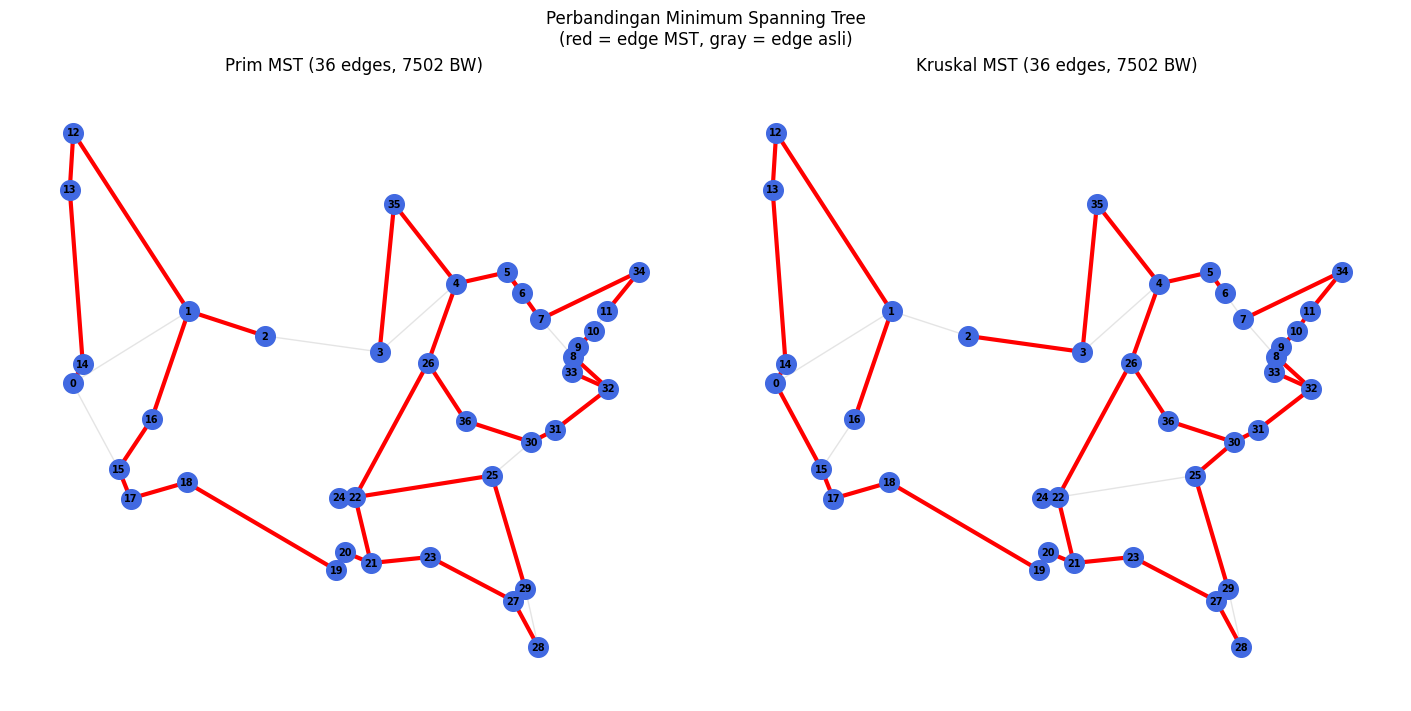

In [7]:
def draw_mst(mst_edges, title, pos, ax):
    """Gambar seluruh graf → abu-abu, lalu MST → merah tebal."""
    # 1) seluruh graf (agar kontekstual)
    nx.draw_networkx_edges(
        G, pos, ax=ax,
        edge_color='lightgray', width=1, alpha=0.6
    )
    nx.draw_networkx_nodes(
        G, pos, ax=ax,
        node_color='royalblue', node_size=200
    )
    # 2) highlight MST
    mst_el = [(u, v) for u, v, _ in mst_edges]
    nx.draw_networkx_edges(
        G, pos, edgelist=mst_el, ax=ax,
        edge_color='red', width=3
    )
    nx.draw_networkx_labels(
        G, pos, ax=ax, font_size=7, font_weight='bold'
    )
    ax.set_title(title)
    ax.axis('off')


fig, axes = plt.subplots(1, 2, figsize=(14, 7), constrained_layout=True)
draw_mst(mst_prim,    f'Prim MST ({len(mst_prim)} edges, {total_prim} BW)',    pos, axes[0])
draw_mst(mst_kruskal, f'Kruskal MST ({len(mst_kruskal)} edges, {total_kruskal} BW)', pos, axes[1])

plt.suptitle('Perbandingan Minimum Spanning Tree\n(red = edge MST, gray = edge asli)')
plt.show()